# Explore here

In [12]:
import os
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns

# Load environment variables from .env file
load_dotenv()

# Get client ID and client secret from environment variables
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

# Initialize Spotify client
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# Radiohead's Spotify artist link
artist_uri = 'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb'

# Retrieve top tracks
results = spotify.artist_top_tracks(artist_uri)

# Extract relevant information into a list of dictionaries
tracks_data = []
for track in results['tracks']:
    track_id = track['id']
    track_features = spotify.audio_features(track_id)[0]
    track_info = {
        'name': track['name'],
        'popularity': track['popularity'],
        'duration_ms': track['duration_ms'],  
        'valence': track_features['valence'],
        'energy': track_features['energy']   
    }
    tracks_data.append(track_info)

# Convert to DataFrame
df = pd.DataFrame(tracks_data)

# Convert duration from milliseconds to seconds
df['duration_seconds'] = df['duration_ms'] / 1000

# Sort by increasing popularity and display top 3
if not df.empty:
    top_3_tracks = df.sort_values(by='popularity', ascending=True).head(3)
    print("Top 3 tracks sorted by increasing popularity:")
    print(top_3_tracks[['name', 'popularity']])
else:
    print("No tracks found for the artist.")

# Print DataFrame's head to verify structure
print("\nDataFrame head:")
print(df.count())



Top 3 tracks sorted by increasing popularity:
                    name  popularity
7  Weird Fishes/ Arpeggi          68
8                   Just          68
9             All I Need          68

DataFrame head:
name                10
popularity          10
duration_ms         10
valence             10
energy              10
duration_seconds    10
dtype: int64


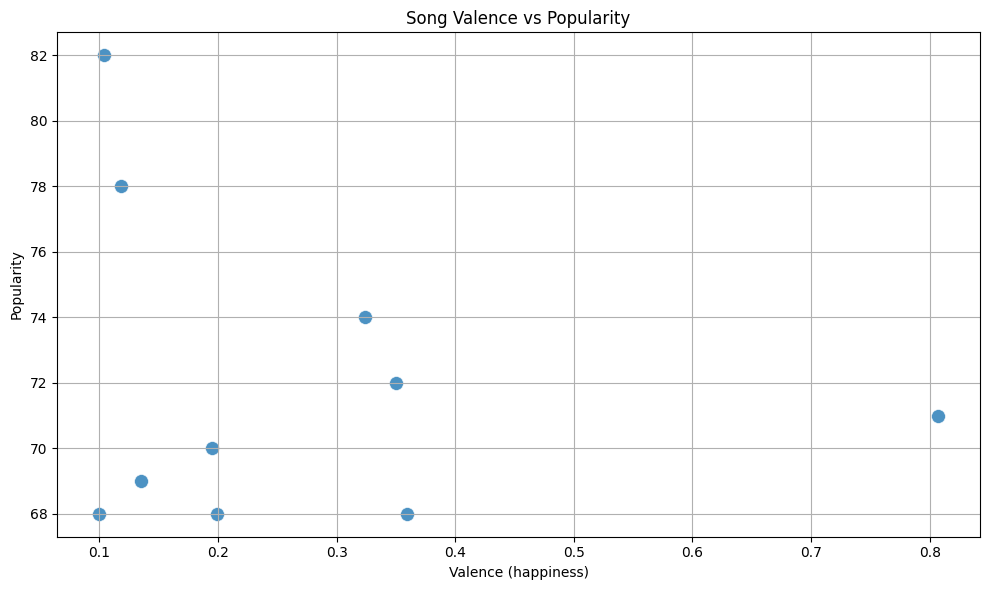

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting: Scatter plot of Valence vs Popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='valence', y='popularity', data=df, s=100, alpha=0.8, edgecolor='w', linewidth=0.5)
plt.title('Song Valence vs Popularity')
plt.xlabel('Valence (happiness)')
plt.ylabel('Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()

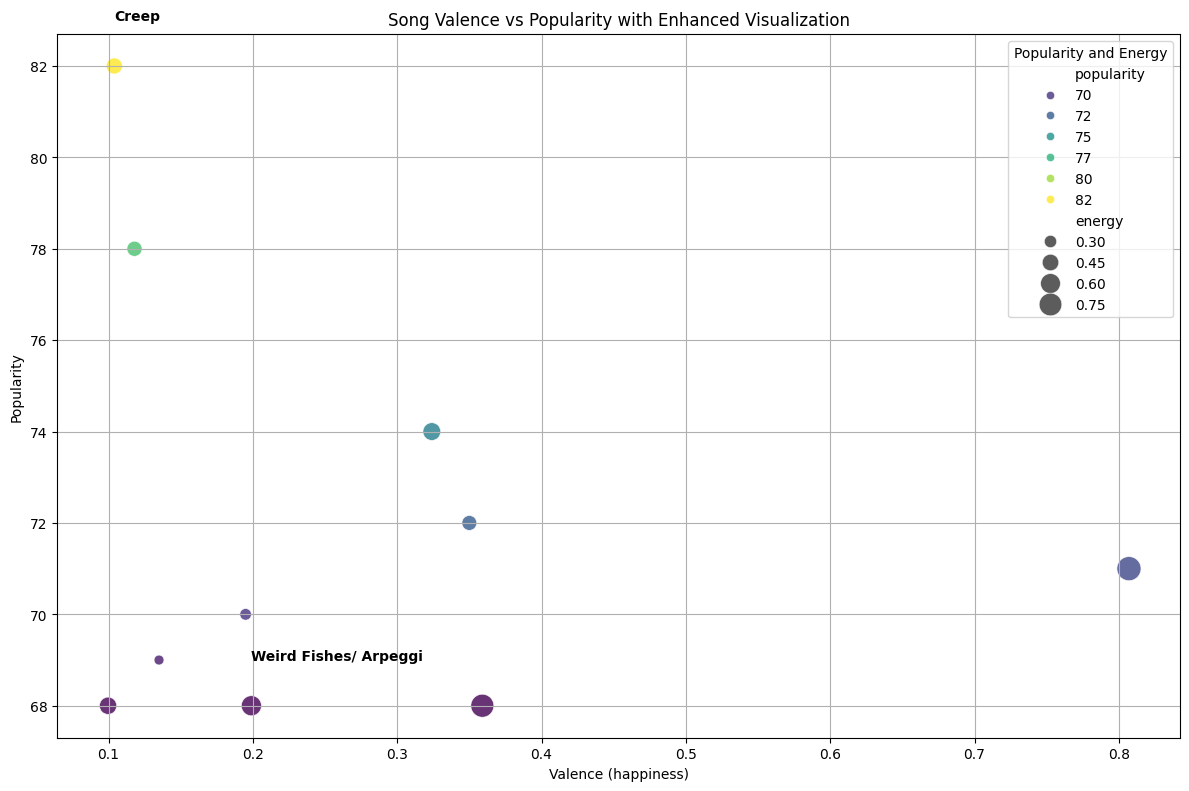

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting: Scatter plot of Valence vs Popularity with enhancements
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x='valence', 
    y='popularity', 
    data=df, 
    hue='popularity', 
    size='energy', 
    sizes=(50, 300), 
    palette='viridis', 
    alpha=0.8, 
    edgecolor='w', 
    linewidth=0.5
)

# Add annotations for the most and least popular songs
max_popularity = df['popularity'].max()
min_popularity = df['popularity'].min()
max_pop_song = df[df['popularity'] == max_popularity].iloc[0]
min_pop_song = df[df['popularity'] == min_popularity].iloc[0]

scatter.text(max_pop_song['valence'], max_pop_song['popularity'] + 1, max_pop_song['name'], horizontalalignment='left', size='medium', color='black', weight='semibold')
scatter.text(min_pop_song['valence'], min_pop_song['popularity'] + 1, min_pop_song['name'], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('Song Valence vs Popularity with Enhanced Visualization')
plt.xlabel('Valence (happiness)')
plt.ylabel('Popularity')
plt.legend(title='Popularity and Energy')
plt.grid(True)
plt.tight_layout()
plt.show()